# Analisis del entrenamiento

## Módulos y rutas

Rutas de los archivos

In [2]:
#nombre del compuesto
nombre_compuesto="bo222-200k-1173k"

# Ruta al archivo metrics 
path_metric_csv = "output/metrics.csv"

path_splits_npz= "output/splits.npz"

# Ruta al modelo entrenado
path_trained_model="output/epoch=1239-val_loss=0.0001-test_loss=0.0689.ckpt"

# Ruta al dataset que uso torchmd-net
path_torchmdnet_dataset_h5 ="input/bo222-200k-1173k.h5"
#path_torchmdnet_dataset_h5 = "../00-procesamiento-datos/datos-procesados/bo222-200k-1173k-f.h5"


Importar módulos

In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

/root/mambaforge/envs/torchmd-net/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Procesamiento del Dataframe

Cargar datos

In [4]:
# Lee el archivo CSV en un DataFrame de pandas
metrics = pd.read_csv(path_metric_csv)
#metrics['epoch'] = metrics['epoch'].astype(int)

Mostrar primeras filas del DataFrame

In [5]:
# Muestra las primeras filas del DataFrame para verificar la importación
print("Primeros datos")
print(metrics.head())

Primeros datos
   epoch            lr  train_loss    val_loss  std_train   mse_train  \
0    0.0  5.600000e-07  138.966339  134.566620   0.076093  138.966339   
1    1.0  1.120000e-06  127.798103  117.145424   0.226886  127.798103   
2    2.0  1.680000e-06  106.492386   91.991074   0.370713  106.492386   
3    3.0  2.240000e-06   79.634064   63.712772   0.480088   79.634064   
4    4.0  2.800000e-06   51.640991   37.077633   0.578341   51.640991   

   rmse_train  mae_train  std_val     mse_val   rmse_val    mae_val  step  \
0   11.788399  11.787872      NaN  134.566620  11.600285  11.599960     7   
1   11.304781  11.302468      NaN  117.145424  10.823373  10.823031    15   
2   10.319515  10.313342      NaN   91.991074   9.591196   9.590818    23   
3    8.923792   8.912095      NaN   63.712772   7.982027   7.981582    31   
4    7.186166   7.165303      NaN   37.077633   6.089139   6.088567    39   

   test_loss  std_test  mse_test  rmse_test  mae_test  
0        NaN       NaN     

Mostrar últimas filas del dataframe

In [6]:
# Muestra las primeras filas del DataFrame para verificar la importación
print("Últimos datos")
print(metrics.tail())

Últimos datos
       epoch            lr  train_loss  val_loss  std_train  mse_train  \
1708  1708.0  1.000000e-07    0.003246  0.003368   0.001176   0.003246   
1709  1709.0  1.000000e-07    0.003245  0.003367   0.001306   0.003245   
1710  1710.0  1.000000e-07    0.003244  0.003367   0.001327   0.003244   
1711  1711.0  1.000000e-07    0.003248  0.003367   0.001437   0.003248   
1712  1712.0  1.000000e-07    0.003245  0.003368   0.001529   0.003245   

      rmse_train  mae_train  std_val   mse_val  rmse_val   mae_val   step  \
1708    0.056972   0.048432      NaN  0.003368  0.058019  0.049182  13671   
1709    0.056961   0.048433      NaN  0.003367  0.058018  0.049182  13679   
1710    0.056958   0.048424      NaN  0.003367  0.058018  0.049181  13687   
1711    0.056987   0.048452      NaN  0.003367  0.058018  0.049181  13695   
1712    0.056964   0.048431      NaN  0.003368  0.058020  0.049184  13703   

      test_loss  std_test  mse_test  rmse_test  mae_test  
1708        NaN    

### Learning rate contra epoch

Procesamiento de los datos para ser graficados

In [7]:
# Seleccionar las columnas de interés
data_to_save = metrics[['epoch', 'lr']]

# Guardar en un archivo .dat con encabezado
output_path = "graficas/input/graph_lr_vs_epoch/graph_lr_vs_epoch.dat"
data_to_save.to_csv(output_path, sep='\t', index=False, header=["# Epoch", "lr"])

print(f"Datos guardados en {output_path}")

Datos guardados en graficas/input/graph_lr_vs_epoch/graph_lr_vs_epoch.dat


In [17]:
# Importar script
import graficas.scripts.graph_lr_vs_epoch
#importar configuracion
config=graficas.scripts.graph_lr_vs_epoch.default_config()
config["data_path"]="graficas/input/graph_lr_vs_epoch/graph_lr_vs_epoch.dat"
config["leyend_title"]="Learning rate"
config["x_label"]="Epoch"
config["y_label"]="Learnig Rate "  
config["y1_label"]="Train"

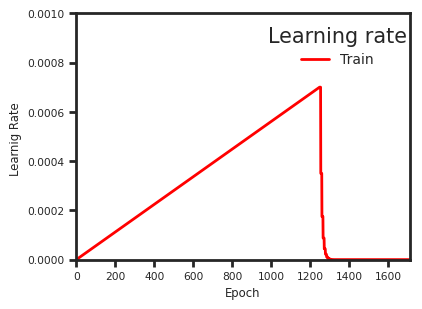

In [18]:
personalizacion=True
if personalizacion:
    config["x_limit"]=(0,1712)
    config["y_limit"]=(0,0.001)
    pass

graficas.scripts.graph_lr_vs_epoch.generate_graph(config)

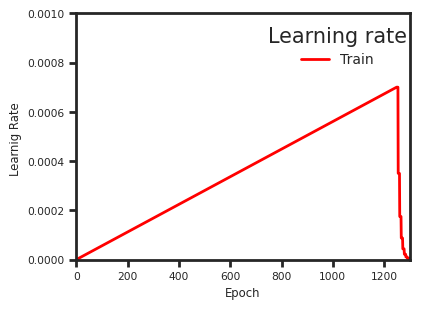

In [20]:
personalizacion=True
if personalizacion:
    config["x_limit"]=(0,1300)
    config["y_limit"]=(0,0.001)
    pass

graficas.scripts.graph_lr_vs_epoch.generate_graph(config)

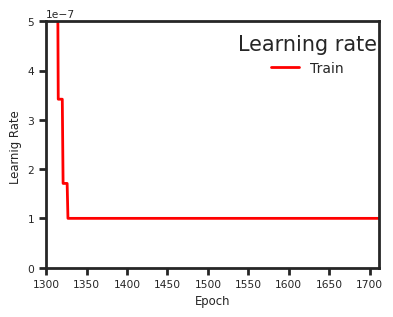

In [24]:
personalizacion=True
if personalizacion:
    config["x_limit"]=(1300,1712)
    config["y_limit"]=(0,0.0000005)
    pass

graficas.scripts.graph_lr_vs_epoch.generate_graph(config)

# Analisis de modelo entrenado

## Analisis de la energía

## Analisis de las fuerzas